In [16]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib notebook

In [17]:
G = nx.Graph()
G.add_edge('A','B',weight=13,relation='friend')
G.add_edge('B','C',weight=9,relation='family')
G.add_edge('B','D',weight=7,relation='friend')
G.add_edge('E','B',weight=10,relation='friend')
G.add_edge('E','A',weight=1,relation='enemy')
G.add_edge('F','B',weight=13,relation='family')
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 13, 'relation': 'friend'}), ('A', 'E', {'weight': 1, 'relation': 'enemy'}), ('B', 'C', {'weight': 9, 'relation': 'family'}), ('B', 'D', {'weight': 7, 'relation': 'friend'}), ('B', 'E', {'weight': 10, 'relation': 'friend'}), ('B', 'F', {'weight': 13, 'relation': 'family'})])

In [18]:
G.add_node('A',role='Trader')
G.add_node('B',role='Analyst')
G.add_node('C',role='Manager')
G.nodes(data=True)


NodeDataView({'A': {'role': 'Trader'}, 'B': {'role': 'Analyst'}, 'C': {'role': 'Manager'}, 'D': {}, 'E': {}, 'F': {}})

<IPython.core.display.Javascript object>


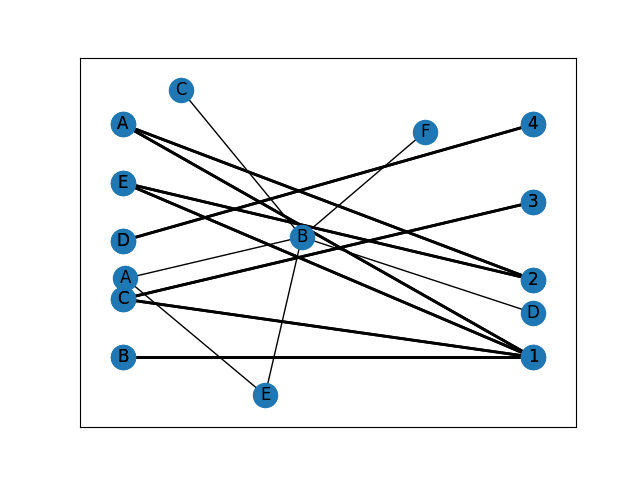

In [19]:
nx.draw_networkx(G, with_labels=True)


In [20]:
from networkx.algorithms import bipartite
B = nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',4),('E',1),('A',2),('E',2)])
bipartite.is_bipartite(B)

True

In [22]:
edges = B.edges()
nx.draw_networkx(
    B,
    pos = nx.drawing.layout.bipartite_layout(B, ['A','B','C','D','E']), 
    width = 2)
print(edges)

[('A', 1), ('A', 2), ('B', 1), ('C', 1), ('C', 3), ('D', 4), ('E', 1), ('E', 2)]


In [23]:
import csv
from operator import itemgetter
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [24]:
with open('quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

FileNotFoundError: [Errno 2] No such file or directory: 'quakers_nodelist.csv'